In [1]:
import itertools
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
real_energies = np.load('results/real_energies.npy')
real_forces = np.load('results/real_forces.npy',allow_pickle=True)

predicted_energies_mace = np.load('results/predicted_energies_mace.npy')
predicted_forces_mace = np.load('results/predicted_forces_mace.npy',allow_pickle=True)

In [3]:
print(len(predicted_energies_mace),len(real_energies))
print(len(predicted_forces_mace),len(real_forces))

14434 14434
14434 14434


In [4]:
def parity_plot(X,y,label):
    reg = LinearRegression().fit(X.reshape(-1, 1),y)
    r2 = reg.score(X.reshape(-1, 1),y)
    linreg_x = np.linspace(min(X),max(X),10)
    linreg_y = reg.predict(linreg_x.reshape(-1, 1))

    plt.plot(linreg_x,linreg_y,color='gray',lw=0.75,label=f'Rˆ2={round(r2,5)}')
    plt.scatter(X, y,s=12)

    plt.xlabel(f'Predicted {label}')
    plt.ylabel(f'Real {label}')
    plt.legend()

In [5]:
x_pred,x_real = [],[]
y_pred,y_real = [],[]
z_pred,z_real = [],[]
force_module_pred,force_module_real = [],[]

for force_mace, real_force in zip(predicted_forces_mace,real_forces):

    force_module_pred.append(force_mace[0][1])
    force_module_real.append(real_force[0][1])

    forces_atom_pred = force_mace[0][0]
    forces_atom_real = real_force[0][0]

    x_pred.append(forces_atom_pred[0])
    x_real.append(forces_atom_real[0])
    
    y_pred.append(forces_atom_pred[1])
    y_real.append(forces_atom_real[1])
    
    z_pred.append(forces_atom_pred[2])
    z_real.append(forces_atom_real[2])

In [6]:
def eval_report(y_pred,y_real):
    mae = metrics.mean_absolute_error(y_real,y_pred)
    rmse = metrics.root_mean_squared_error(y_real,y_pred)

    print(f'MAE: {round(mae,4)}')
    print(f'RMSE: {round(rmse,4)}')

In [7]:
print('Energy Mace')
eval_report(predicted_energies_mace,real_energies)
print()
print('Forces Mace')
eval_report(force_module_pred,force_module_real)
print()
print('Forces Mace X')
eval_report(x_pred,x_real)
print()
print('Forces Mace Y')
eval_report(y_pred,y_real)
print()
print('Forces Mace Z')
eval_report(z_pred,z_real)

Energy Mace
MAE: 4.7011
RMSE: 6.6546

Forces Mace
MAE: 0.553
RMSE: 0.7076

Forces Mace X
MAE: 0.4318
RMSE: 0.5739

Forces Mace Y
MAE: 0.4628
RMSE: 0.8138

Forces Mace Z
MAE: 0.1303
RMSE: 0.1964


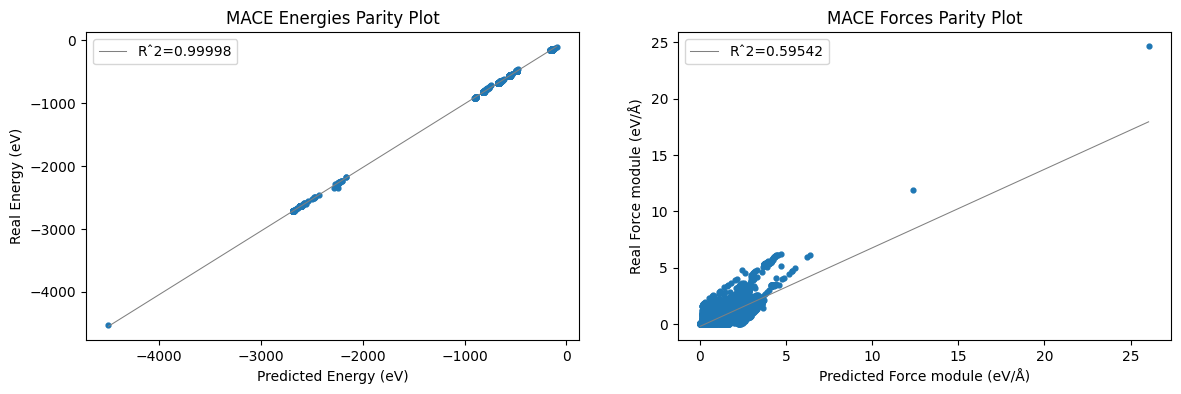

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('MACE Energies Parity Plot')
parity_plot(predicted_energies_mace.reshape(-1, 1),real_energies,label='Energy (eV)')
plt.subplot(122)
plt.title('MACE Forces Parity Plot')
parity_plot(np.array(force_module_pred).reshape(-1, 1),np.array(force_module_real),label='Force module (eV/Å)')

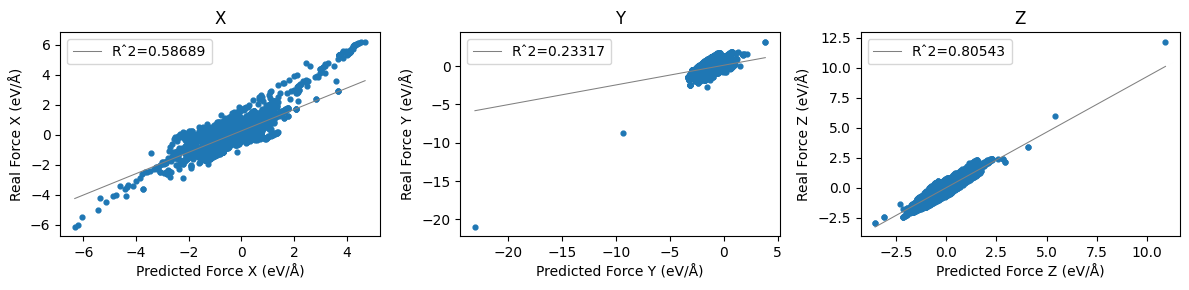

In [9]:
labels,i = ['X','Y','Z'],0

plt.figure(figsize=(12,3))
for pred,real in zip([x_pred,y_pred,z_pred],[x_real,y_real,z_real]):
    plt.subplot(1,3,i+1)
    plt.title(labels[i])
    parity_plot(np.array(pred),np.array(real),label=f'Force {labels[i]} (eV/Å)')
    i+=1

plt.tight_layout()
plt.show()

In [16]:
zro2_ref = np.load('dictionary_zro2.npy',allow_pickle=True)
zro2_ref = zro2_ref.item()

In [15]:
def coded_parity_plot(X,y,label,ref):
    reg = LinearRegression().fit(X.reshape(-1, 1),y)
    r2 = reg.score(X.reshape(-1, 1),y)
    linreg_x = np.linspace(min(X),max(X),10)
    linreg_y = reg.predict(linreg_x.reshape(-1, 1))

    plt.plot(linreg_x,linreg_y,color='gray',lw=0.75) #,label=f'Rˆ2={round(r2,5)}')
    
    colors = ['#66c5cc', '#f6cf71', '#f89c74', '#dcb0f2', '#87c55f', '#9eb9f3', '#fe88b1', '#c9db74', '#8be0a4', '#b497e7']
    symbols = ['o', 's', '^', 'v', '<', '>', 'p', '*', 'D', 'x']
    code = list(itertools.zip_longest(colors, symbols, fillvalue=None))
    
    geometries = [i[1] for i in ref.values()]
    geometries_set = set(geometries)

    geometries_combinations = {}
    for i,geometry in enumerate(geometries_set):
        geometries_combinations[geometry] = code[i]
    
    geometry_test = []
    for i in range(len(X)):
        geometry_set = geometries_combinations[ref[i][1]]

        if ref[i][1] not in geometry_test:
            geometry_test.append(ref[i][1])
            plt.scatter(X[i],y[i],s=25,color=geometry_set[0],marker=geometry_set[1],alpha=0.75,label=ref[i][1])
        else:
            plt.scatter(X[i],y[i],s=25,color=geometry_set[0],marker=geometry_set[1],alpha=0.75)

    plt.xlabel(f'Predicted {label}')
    plt.ylabel(f'Real {label}')
    plt.legend()

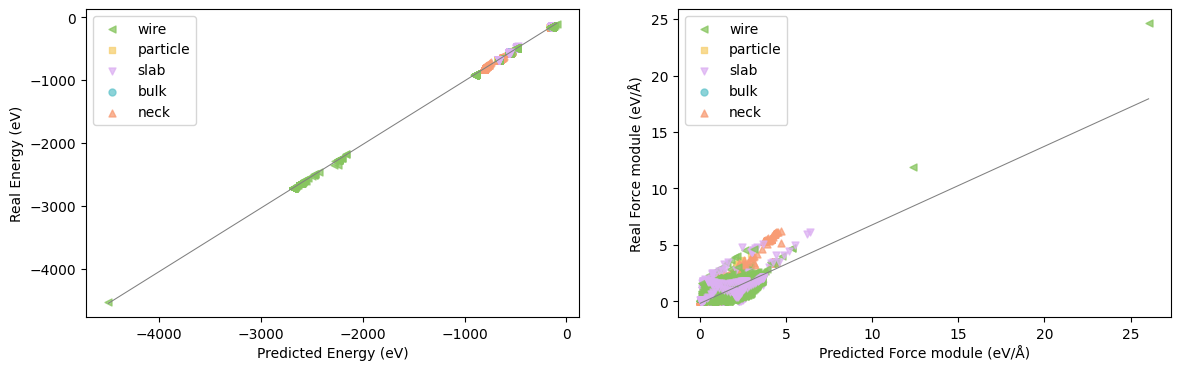

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
coded_parity_plot(predicted_energies_mace.reshape(-1, 1),real_energies,'Energy (eV)',zro2_ref)
plt.subplot(122)
coded_parity_plot(np.array(force_module_pred).reshape(-1, 1),np.array(force_module_real),'Force module (eV/Å)',zro2_ref)